<a href="https://colab.research.google.com/github/dkmau2004/Content/blob/main/house_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelling House Prices

## Importing libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import xgboost as xgb
from xgboost import XGBRegressor, plot_importance

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
import shap

## Define Functions

In [ ]:
def evaluate_preds(y_true, y_preds):
    # Calculate R2 Score
    r2 = r2_score(y_true, y_preds)

    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(y_true, y_preds))

    # Print the R2 Score
    print(f"R2 Score: {r2:.4f}")

    # Print the RMSE
    print(f"RMSE: {rmse:.4f}")

## Reading files

In [ ]:
train, test = train_test_split(pd.read_csv('/content/train.csv'), test_size=0.2, random_state=42)

##Analysing the files

In [ ]:
print("Dataset of train:")
display(train) #Showing the contents of the datasheet

Dataset of train:


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
254,255,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,145000
1066,1067,60,RL,59.0,7837,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2009,WD,Normal,178000
638,639,30,RL,67.0,8777,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,5,2008,WD,Normal,85000
799,800,50,RL,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2007,WD,Normal,175000
380,381,50,RL,50.0,5000,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,127000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,1096,20,RL,78.0,9317,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2007,WD,Normal,176432
1130,1131,50,RL,65.0,7804,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,12,2009,WD,Normal,135000
1294,1295,20,RL,60.0,8172,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,115000
860,861,50,RL,55.0,7642,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,6,2007,WD,Normal,189950


In [ ]:
print("Dataset of test:")
display(test)

Dataset of test:


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
892,893,20,RL,70.0,8414,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2006,WD,Normal,154500
1105,1106,60,RL,98.0,12256,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,325000
413,414,30,RM,56.0,8960,Pave,Grvl,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2010,WD,Normal,115000
522,523,50,RM,50.0,5000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2006,WD,Normal,159000
1036,1037,20,RL,89.0,12898,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,9,2009,WD,Normal,315500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479,480,30,RM,50.0,5925,Pave,NaN,Reg,Bnk,AllPub,...,0,NaN,MnPrv,NaN,0,3,2007,WD,Alloca,89471
1361,1362,20,RL,124.0,16158,Pave,NaN,IR1,Low,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,260000
802,803,60,RL,63.0,8199,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2008,WD,Normal,189000
651,652,70,RL,60.0,9084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,10,2009,WD,Normal,108000


In [ ]:
train.info() #printing information about the dataset

<class 'pandas.core.frame.DataFrame'>
Index: 1168 entries, 254 to 1126
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    951 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          74 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallCond

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 292 entries, 892 to 722
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             292 non-null    int64  
 1   MSSubClass     292 non-null    int64  
 2   MSZoning       292 non-null    object 
 3   LotFrontage    250 non-null    float64
 4   LotArea        292 non-null    int64  
 5   Street         292 non-null    object 
 6   Alley          17 non-null     object 
 7   LotShape       292 non-null    object 
 8   LandContour    292 non-null    object 
 9   Utilities      292 non-null    object 
 10  LotConfig      292 non-null    object 
 11  LandSlope      292 non-null    object 
 12  Neighborhood   292 non-null    object 
 13  Condition1     292 non-null    object 
 14  Condition2     292 non-null    object 
 15  BldgType       292 non-null    object 
 16  HouseStyle     292 non-null    object 
 17  OverallQual    292 non-null    int64  
 18  OverallCond  

### Missing Values

In [ ]:
missing = train.isna().sum() #isna checks if the dataset has a null or missing values, which are then summed up under each column
missing = missing[missing > 0].sort_values(ascending=False) #sorts the dataset of missing in descending order and removing zero values

In [ ]:
missing_per = train.isna().mean() * 100 #mean percentage of the missing values
missing_per = missing_per[missing_per > 0].sort_values(ascending=False)

In [ ]:
missing_table = pd.DataFrame({"missing_value": missing, "missing_percentage": missing_per}) #grouping the value of missing and the percentage of missing into one table
print("Columns with missing values:\n")
print(missing_table)

Columns with missing values:

              missing_value  missing_percentage
PoolQC                 1162           99.486301
MiscFeature            1122           96.061644
Alley                  1094           93.664384
Fence                   935           80.051370
MasVnrType              683           58.476027
FireplaceQu             547           46.832192
LotFrontage             217           18.578767
GarageType               64            5.479452
GarageYrBlt              64            5.479452
GarageFinish             64            5.479452
GarageQual               64            5.479452
GarageCond               64            5.479452
BsmtCond                 28            2.397260
BsmtFinType1             28            2.397260
BsmtExposure             28            2.397260
BsmtQual                 28            2.397260
BsmtFinType2             28            2.397260
MasVnrArea                6            0.513699
Electrical                1            0.085616


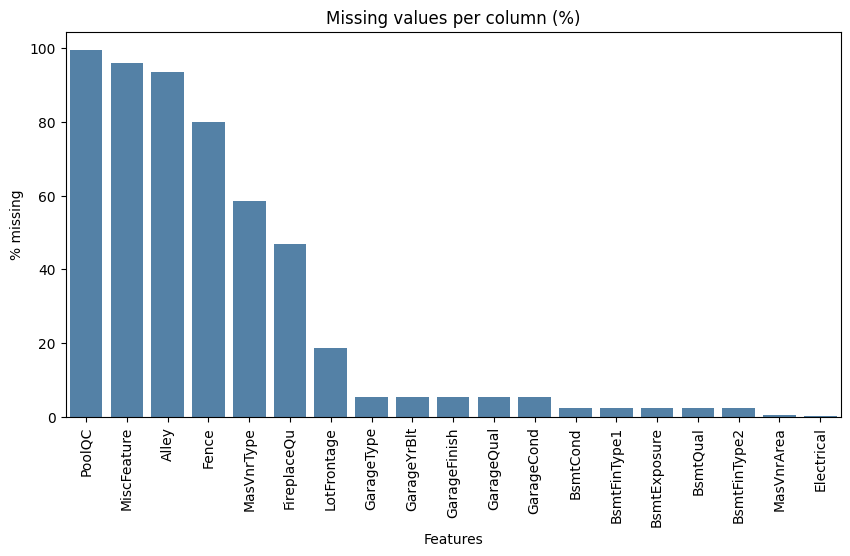

In [ ]:
# plotting percentage of missing values for each column
plt.figure(figsize=(10,5))
sns.barplot(x=missing.index, y=missing_per, color="steelblue")
plt.xticks(rotation=90)
plt.ylabel("% missing")
plt.xlabel("Features")
plt.title("Missing values per column (%)")
plt.show()

Dropping PoolQC because of high missing percentage. Even if it is predictive, the model might not use it because the feature is so unbalanced.

In [ ]:
columns_dropped_due_to_missings = ['PoolQC']

count      1168.000000
mean     181441.541952
std       77263.583862
min       34900.000000
25%      130000.000000
50%      165000.000000
75%      214925.000000
max      745000.000000
Name: SalePrice, dtype: float64


/tmp/ipython-input-487569205.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['SalePrice'], color='steelblue', bins=100, hist_kws={'alpha': 0.4});


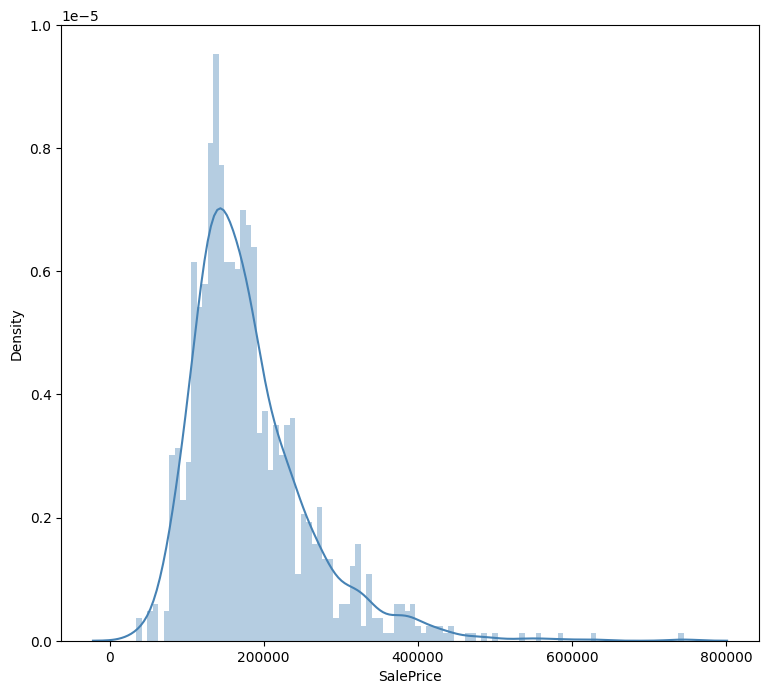

In [ ]:
print(train['SalePrice'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(train['SalePrice'], color='steelblue', bins=100, hist_kws={'alpha': 0.4});

###Correlation

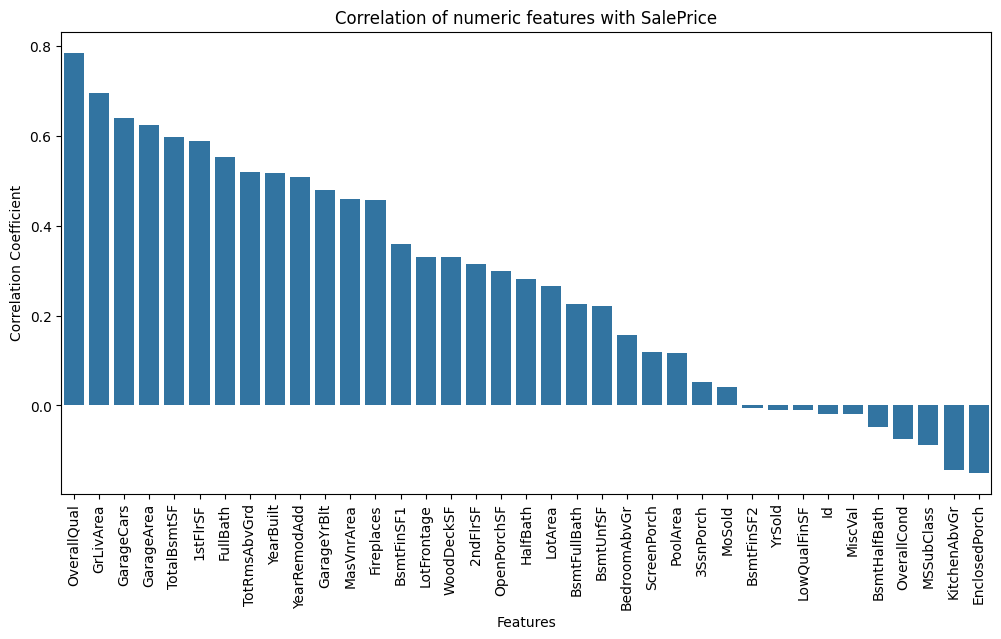

In [ ]:
numeric_cols = train.select_dtypes(include=['int64', 'float64']).columns
numeric_cols = numeric_cols.drop("SalePrice")
co = train[numeric_cols].corrwith(train["SalePrice"]).sort_values(ascending=False)
plt.figure(figsize=(12,6))
sns.barplot(x=co.index, y=co.values)
plt.xticks(rotation=90)
plt.title("Correlation of numeric features with SalePrice")
plt.xlabel("Features")
plt.ylabel("Correlation Coefficient")
plt.show()

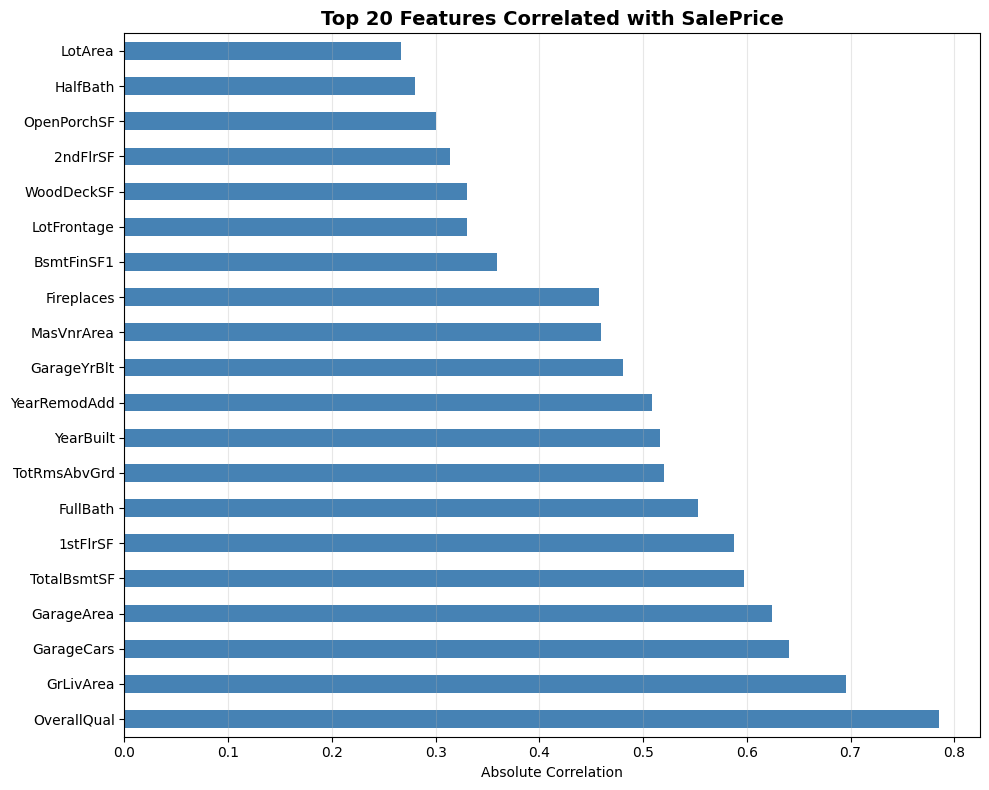

Top correlated features with SalePrice:
----------------------------------------
OverallQual         : 0.7856
GrLivArea           : 0.6957
GarageCars          : 0.6410
GarageArea          : 0.6241
TotalBsmtSF         : 0.5978
1stFlrSF            : 0.5879
FullBath            : 0.5525
TotRmsAbvGrd        : 0.5204
YearBuilt           : 0.5165
YearRemodAdd        : 0.5086
GarageYrBlt         : 0.4804
MasVnrArea          : 0.4591
Fireplaces          : 0.4575
BsmtFinSF1          : 0.3595
LotFrontage         : 0.3301
WoodDeckSF          : 0.3298
2ndFlrSF            : 0.3140
OpenPorchSF         : 0.3000
HalfBath            : 0.2805
LotArea             : 0.2662


In [ ]:
# Calculate correlations with SalePrice
correlations = train.select_dtypes(include=[np.number]).corr()['SalePrice'].abs().sort_values(ascending=False)
top_corr_features = correlations.head(21)

# Visualize top correlations
plt.figure(figsize=(10, 8))
top_corr_features.drop('SalePrice').plot(kind='barh', color='steelblue')
plt.title('Top 20 Features Correlated with SalePrice', fontsize=14, fontweight='bold')
plt.xlabel('Absolute Correlation')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

# Print correlation values
print("Top correlated features with SalePrice:")
print("-" * 40)
for feature, corr in top_corr_features.items():
    if feature != 'SalePrice':
        print(f"{feature:<20}: {corr:.4f}")


###Sale Price Comparisons

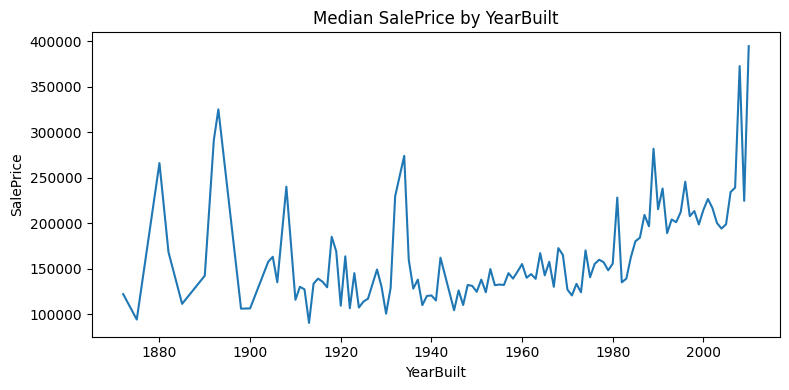

In [ ]:
y_price = train.groupby("YearBuilt")["SalePrice"].median().reset_index()
plt.figure(figsize=(8,4))
sns.lineplot(data=y_price, x="YearBuilt", y="SalePrice")
plt.title("Median SalePrice by YearBuilt"); plt.tight_layout(); plt.show()

In [ ]:
y_train = train['SalePrice']
y_test = test['SalePrice']
x_train = train.drop(['SalePrice']+columns_dropped_due_to_missings, axis=1)
x_test = test.drop(['SalePrice']+columns_dropped_due_to_missings, axis=1)

In [ ]:
all_data = pd.concat([x_train, x_test], axis=0)

for col in [col for col in all_data.select_dtypes(include=["number"]).columns if col != "Id"]:
  all_data[col] = all_data[col].fillna(all_data[col].median())

for col in all_data.select_dtypes(include=["object", "category"]).columns:
    all_data[col] = all_data[col].fillna(all_data[col].mode()[0])

all_data = pd.get_dummies(all_data)
bool_cols = all_data.select_dtypes(include=["bool"]).columns
all_data[bool_cols] = all_data[bool_cols].astype(int)

x_train = all_data.iloc[:len(train), :]
x_test = all_data.iloc[len(train):, :]

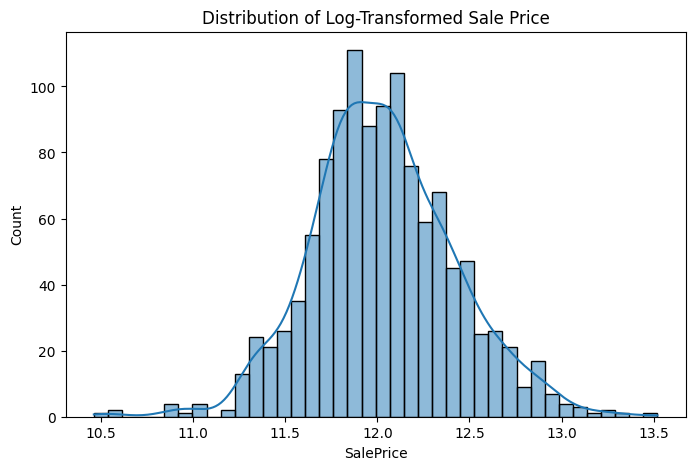

In [ ]:
#Effect of log transforming price
plt.figure(figsize=(8,5))
sns.histplot(np.log1p(train['SalePrice']), kde=True, bins=40)
plt.title("Distribution of Log-Transformed Sale Price")
plt.show()

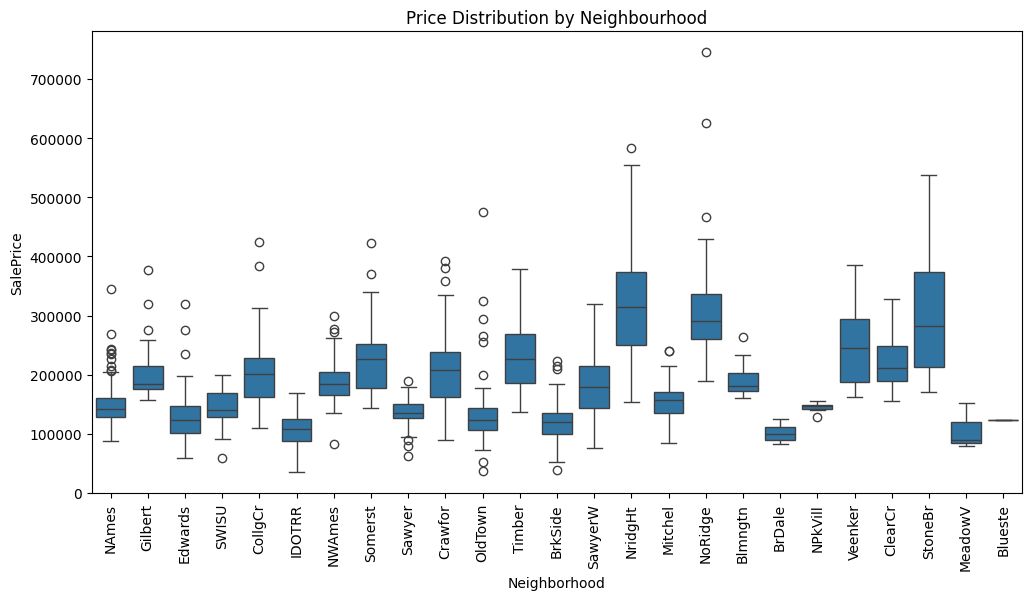

In [ ]:
#Relationship between price and neighbourhood
plt.figure(figsize=(12,6))
sns.boxplot(x="Neighborhood", y="SalePrice", data=train)
plt.xticks(rotation=90)
plt.title("Price Distribution by Neighbourhood")
plt.show()

This box plot shows how neighborhood does affect sale price as the median of each data is different. Some data shows a small ranges therefore there could be missing data.

### Predictions

In [ ]:
# Build and train model
model = LinearRegression()
model.fit(x_train, y_train)

# Predictions
y_pred_lin = model.predict(x_test)

# Evaluation
evaluate_preds(y_test, y_pred_lin)

R2 Score: 0.8852
RMSE: 29679.3992


In [ ]:
y_train_log = np.log1p(y_train)

# Build and train model
model = LinearRegression()
model.fit(x_train, y_train_log)

# Predictions
y_pred_log = model.predict(x_test)

# Evaluation
evaluate_preds(y_test, np.expm1(y_pred_log))

R2 Score: 0.9323
RMSE: 22786.5340


This shows that log transformation affects linear regression as the R2 score is closer to 1.

##XGBoost Modelling

In [24]:
# Create an expanded hyperparameter grid for XGBoost
xgb_param_grid = {
    'learning_rate': [0.046, 0.05, 0.054],
    'n_estimators': [250],
    'max_depth': [7],
    'min_child_weight': [1, 2, 3],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.65, 0.69, 0.7, 0.71, 0.75, 0.8],
    'gamma': [0, 0.05, 0.1, 0.3, 0.5],
    'scale_pos_weight': [1, 10, 50, 100]
}

# Setup RandomizedSearchCV for XGBoost
rs_xgb = RandomizedSearchCV(XGBRegressor(random_state=42),
                            param_distributions=xgb_param_grid,
                            n_iter=50,
                            cv=5,
                            verbose=True,
                            n_jobs=-1,
                            random_state=42)

# Fit RandomizedSearchCV for XGBoost
rs_xgb.fit(x_train, y_train)

# Make predictions
y_preds_rs = rs_xgb.predict(x_test)

# Evaluate predictions
evaluate_preds(y_test, y_preds_rs)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
R2 Score: 0.9262
RMSE: 23793.2481


In [25]:
# Get the best hyperparameters from RandomizedSearchCV for XGBoost
best_params_xgb = rs_xgb.best_params_

print("Best Hyperparameters for XGBoost:")
for param, value in best_params_xgb.items():
    print(f"  {param}: {value}")

Best Hyperparameters for XGBoost:
  subsample: 0.7
  scale_pos_weight: 50
  n_estimators: 250
  min_child_weight: 2
  max_depth: 7
  learning_rate: 0.054
  gamma: 0.3
  colsample_bytree: 0.75


In [26]:
# Initialize the XGBoost model with the best found parameters
xgb = XGBRegressor(
    random_state=42,
    n_jobs=-1,
    **best_params_xgb  # Apply the best hyperparameters found
)

In [27]:
xgb_model= xgb.fit(x_train, y_train)
y_pred_xgb = xgb_model.predict(x_test)
test2=test.copy()
test2["SalePricePred"] = y_pred_xgb
test2.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,SalePricePred
892,893,20,RL,70.0,8414,Pave,NaN,Reg,Lvl,AllPub,...,NaN,MnPrv,NaN,0,2,2006,WD,Normal,154500,146035.828125
1105,1106,60,RL,98.0,12256,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,4,2010,WD,Normal,325000,328442.468750
413,414,30,RM,56.0,8960,Pave,Grvl,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,3,2010,WD,Normal,115000,107543.140625
522,523,50,RM,50.0,5000,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,10,2006,WD,Normal,159000,153593.734375
1036,1037,20,RL,89.0,12898,Pave,NaN,IR1,HLS,AllPub,...,NaN,NaN,NaN,0,9,2009,WD,Normal,315500,332318.687500


In [28]:
# Evaluation
print("R2 Score:", r2_score(y_test, test2["SalePricePred"]))
print("RMSE:", np.sqrt(mean_squared_error(y_test, test2["SalePricePred"])))

R2 Score: 0.9261936545372009
RMSE: 23793.24811790101


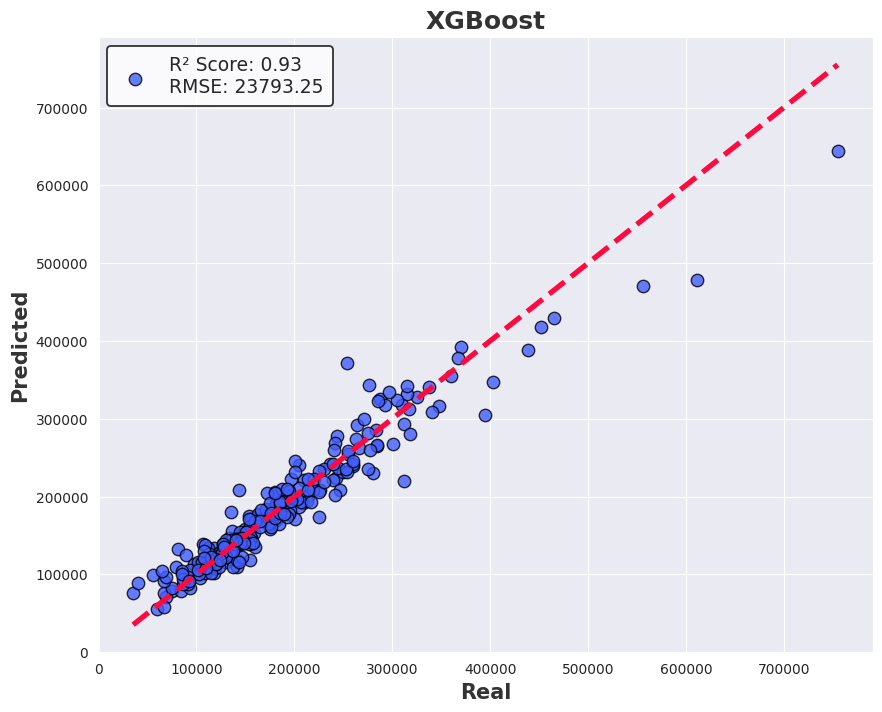

In [29]:
# Compute R² score and RMSE
r2 = r2_score(y_test, y_pred_xgb)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_xgb))

# Choose a style for the plot
sns.set_style('darkgrid')
sns.set_palette("crest")

# Set figure size
plt.figure(figsize=(10, 8))

# Scatter plot: Actual vs Predicted values
plt.scatter(y_test, y_pred_xgb, color='#415eff', alpha=0.8, edgecolors='black', s=80)

# Plot the line of perfect prediction (45-degree line)
plt.plot([min(y_test), max(y_test)],
         [min(y_test), max(y_test)],
         color='#ff0a3f', linestyle='--', lw=3.8, label="Perfect Fit (y=x)")

# Create legend text
legend_text = f'R² Score: {r2:.2f}\nRMSE: {rmse:.2f}'

# Add a legend
legend = plt.legend([legend_text], loc="upper left", fontsize=13.5,
                    frameon=True, edgecolor="black", facecolor="white",
                    borderpad=0.5)

# Increase border thickness
legend.get_frame().set_linewidth(1.3)

# Title and labels
plt.title('XGBoost', fontsize=18, fontweight='bold', color='#333333')
plt.xlabel('Real', fontsize=15, fontweight='bold', color='#333333')
plt.ylabel('Predicted', fontsize=15, fontweight='bold', color='#333333')

# Display grid and plot
plt.grid(True)
plt.show()

<Figure size 1000x600 with 0 Axes>

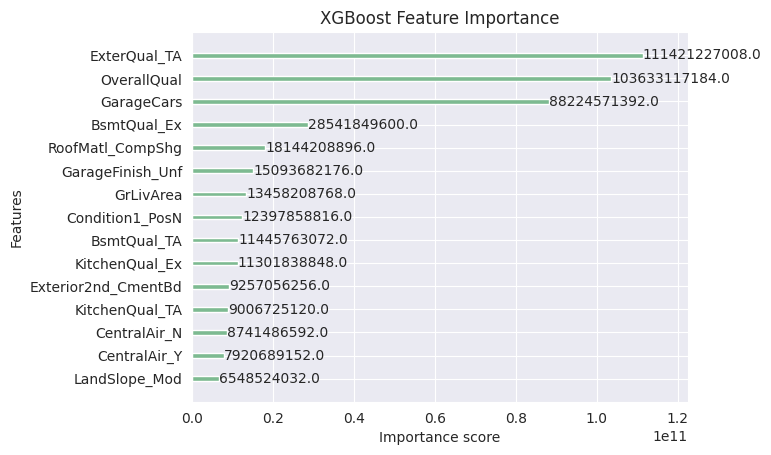

In [30]:
# ---- Feature Importance (XGBoost built-in) ----
plt.figure(figsize=(10,6))
plot_importance(xgb_model, importance_type="gain", max_num_features=15)  # "weight", "gain", or "cover"
plt.title("XGBoost Feature Importance")
plt.show()

 99%|===================| 1152/1168 [00:17<00:00]       

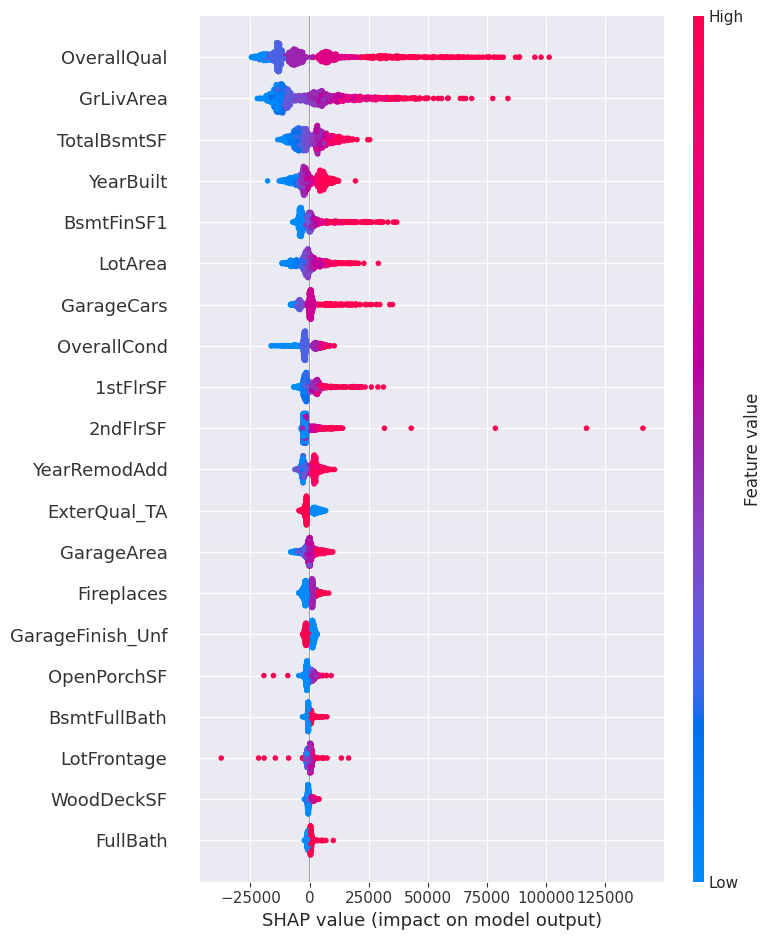

In [31]:
# ---- SHAP values ----
explainer = shap.Explainer(xgb_model, x_train)
shap_values = explainer(x_train)

# Summary plot (beeswarm)
shap.summary_plot(shap_values, x_train)

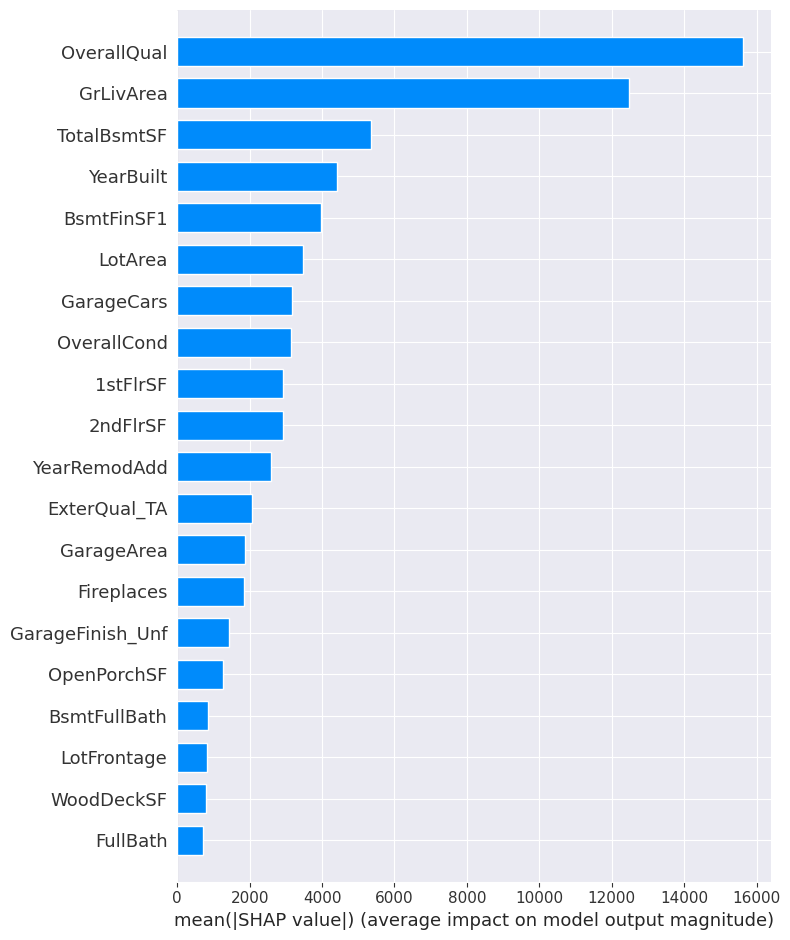

In [32]:
# Bar plot (mean absolute SHAP values)
shap.summary_plot(shap_values, x_train, plot_type="bar")